In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
df=pd.read_excel('Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [138]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


1. Duplicate Purchases
Repeated InvoiceNo = multiple items in one order.

Feature Idea: NumItemsPerInvoice

 2. Product Popularity
Most common item: WHITE HANGING HEART T-LIGHT HOLDER

Feature Idea: Flag popular items, group by frequency

 3. Missing CustomerID
25% rows missing CustomerID. Don't drop, but use:

HasCustomerID = 1/0

Compare average spend, time, returns, etc.

 4. Returns Handling
Negative Quantity/UnitPrice means product return or refund

Feature: IsReturn, ReturnAmount

 5. Outliers
Very high quantity (80,995), unit price (38,970), and even negative prices

Require log-transform or capping

Flag as anomalies

 6. Dominant Country
UK = 91% of transactions

Use as baseline class in modeling

Consider aggregating minor countries or creating regional groups

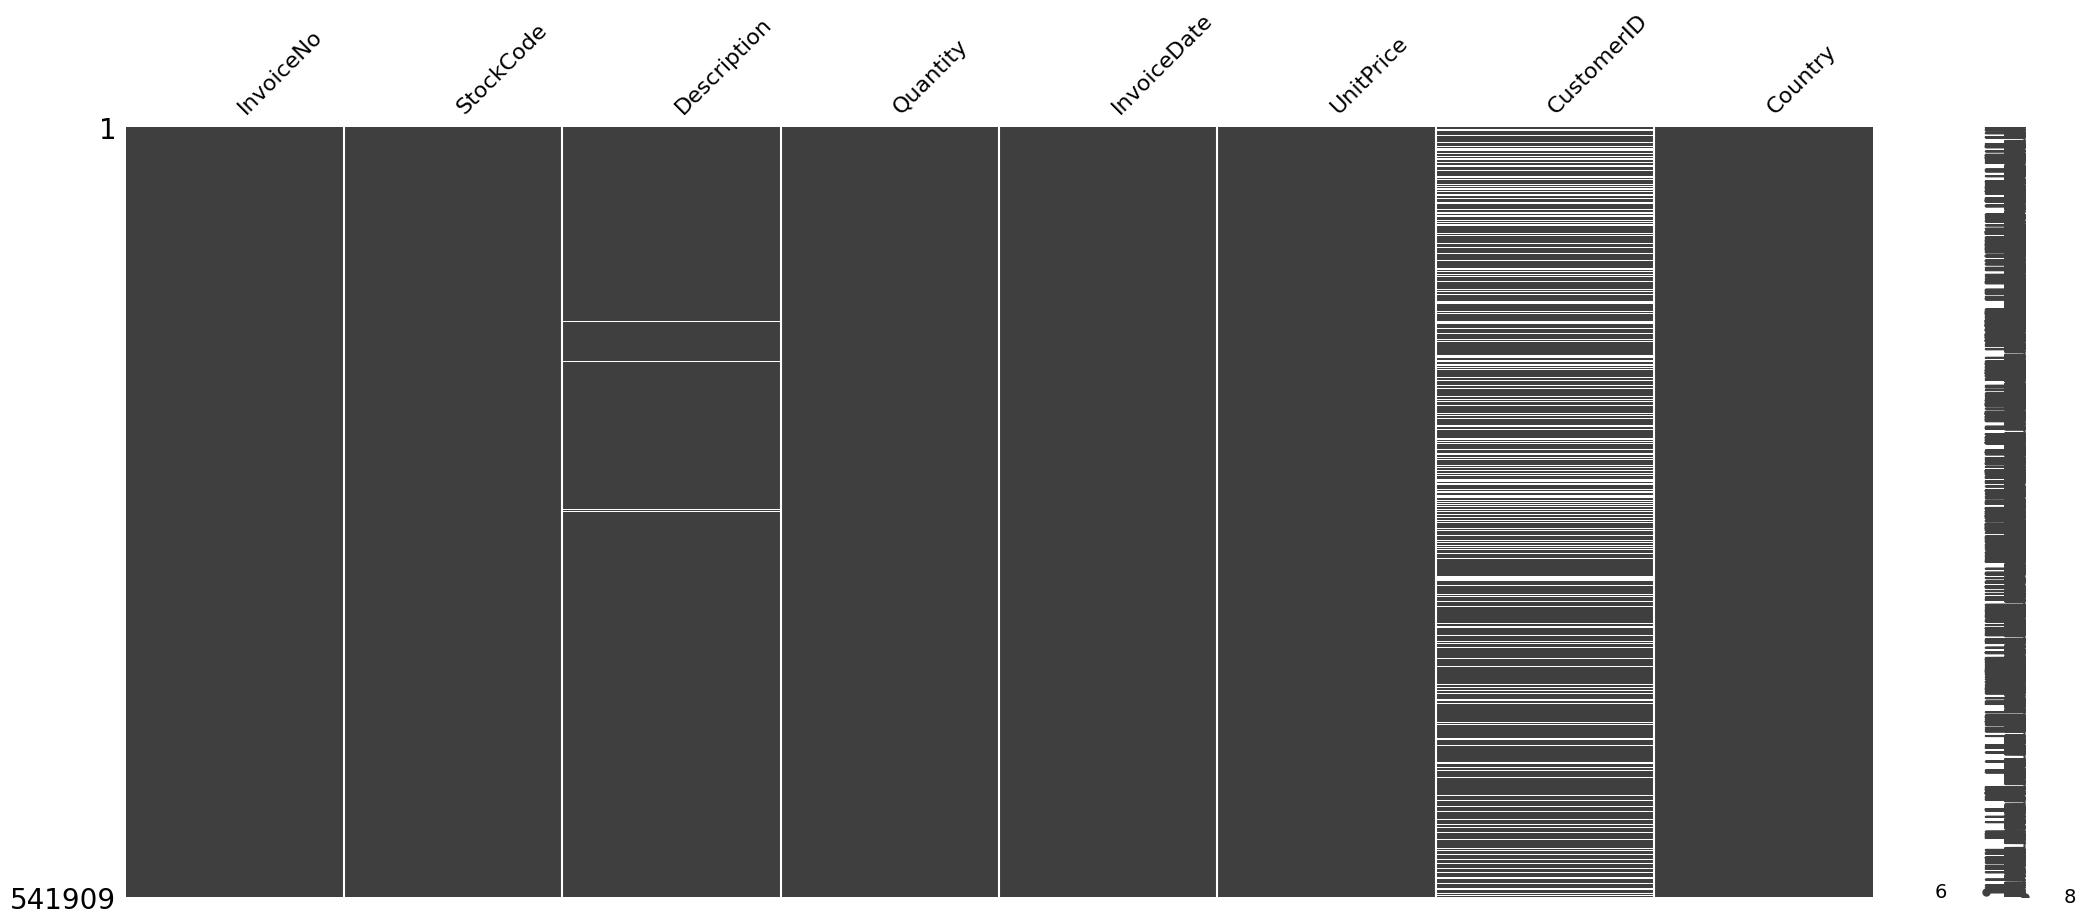

In [139]:
import missingno as msno
msno.matrix(df)
plt.show()

In [140]:
df['Description'].nunique()

4223

In [141]:
df=df.drop(columns=['Description'])

In [142]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [143]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [144]:
df['CustomerID']=df['CustomerID'].fillna('Non Id')

In [145]:
df['CustomerID'].value_counts()

CustomerID
Non Id     135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13270.0         1
17763.0         1
17291.0         1
15668.0         1
15562.0         1
Name: count, Length: 4373, dtype: int64

In [146]:
df['CustomerID'].isnull().sum()

0

In [147]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [148]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [149]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [150]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['InvoiceMinute'] = df['InvoiceDate'].dt.minute
df['InvoiceWeekday'] = df['InvoiceDate'].dt.weekday
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,2
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,2
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2


Add a new boolean column to identify if the purchase was made on a weekend (Saturday or Sunday):

In [151]:
df['IsWeekend'] = df['InvoiceWeekday'] >= 5

In [152]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday,IsWeekend
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,2,False
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2,False
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,2,False
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2,False
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2,False


In [153]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['InvoiceMonth'].apply(get_season)


In [154]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday,IsWeekend,Season
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,2,False,Winter
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2,False,Winter
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,2,False,Winter
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2,False,Winter
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,2,False,Winter


In [155]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

Aggregate data to understand buying trends by different time frames:

Quantity sold by hour of day:

In [156]:
quantity_by_hour = df.groupby('InvoiceHour')['Quantity'].sum()
print(quantity_by_hour)

InvoiceHour
6        -86
7      15361
8     158163
9     429366
10    684416
11    637672
12    823935
13    676803
14    571549
15    609710
16    312317
17    156331
18     60615
19     32030
20      8268
Name: Quantity, dtype: int64


At hour 6, the total quantity sold is -86 (which probably indicates returns or cancellations since quantity is negative).

At hour 9, total quantity sold is 429,366.

At hour 12, total quantity sold is 823,935, which is the highest in this range.

Quantity sold by weekday:

In [157]:
quantity_by_weekday = df.groupby('InvoiceWeekday')['Quantity'].sum()
print(quantity_by_weekday)

InvoiceWeekday
0     815354
1     961543
2     969558
3    1167823
4     794440
6     467732
Name: Quantity, dtype: int64


Quantity sold by season

In [158]:
quantity_by_season = df.groupby('Season')['Quantity'].sum()
print(quantity_by_season)

Season
Fall      1860635
Spring    1021361
Summer    1138938
Winter    1155516
Name: Quantity, dtype: int64


Calculate Days Since First Purchase for Each Customer

In [159]:
df = df.sort_values(['CustomerID', 'InvoiceDate'])

df['FirstPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['DaysSinceFirstPurchase'] = (df['InvoiceDate'] - df['FirstPurchaseDate']).dt.days

In [160]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,1,False,Winter,2011-01-18 10:01:00,0
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,10,17,1,False,Winter,2011-01-18 10:01:00,0
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0


Flag Peak Shopping Hours
If you know typical peak shopping hours (for example 10 AM - 2 PM), you can add:

In [161]:
transactions_by_hour = df.groupby('InvoiceHour')['InvoiceNo'].nunique()
transactions_by_hour


InvoiceHour
6       22
7       31
8      624
9     1824
10    2961
11    3165
12    3962
13    3369
14    3137
15    3069
16    1952
17    1205
18     333
19     219
20      28
Name: InvoiceNo, dtype: int64

In [162]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,1,False,Winter,2011-01-18 10:01:00,0
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,10,17,1,False,Winter,2011-01-18 10:01:00,0
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0


Use CustomerID to understand when a customer first appeared and how long they've been active:

In [163]:
customer_lifetime = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max', 'nunique'])
customer_lifetime['lifetime_days'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days

In [164]:
customer_lifetime

,min,max,nunique,lifetime_days
CustomerID,,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,2,0
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,365
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,282
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,0
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,0
...,...,...,...,...
18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,1,0
18282.0,2011-08-05 13:35:00,2011-12-02 11:43:00,3,118
18283.0,2011-01-06 14:14:00,2011-12-06 12:02:00,16,333


min: First purchase date

max: Most recent purchase date

nunique: Number of unique invoices

lifetime_days: Total span of customer activity

Frequency: Count Invoices per Customer

In [165]:
invoice_count = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [166]:
invoice_count

CustomerID
12346.0       2
12347.0       7
12348.0       4
12349.0       1
12350.0       1
           ... 
18281.0       1
18282.0       3
18283.0      16
18287.0       3
Non Id     3710
Name: InvoiceNo, Length: 4373, dtype: int64

Monetary Value: Total Spend per Customer

In [167]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

customer_value = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

In [168]:
customer_value

CustomerID
Non Id     1447682.12
14646.0     279489.02
18102.0     256438.49
17450.0     187482.17
14911.0     132572.62
              ...    
12503.0      -1126.00
17603.0      -1165.30
14213.0      -1192.20
15369.0      -1592.49
17448.0      -4287.63
Name: TotalPrice, Length: 4373, dtype: float64

RFM Analysis (Recency, Frequency, Monetary)
Use CustomerID to build features for segmentation:

In [169]:
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

In [170]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18281.0,181,1,80.82
18282.0,8,3,176.60
18283.0,4,16,2094.88


Recency:

Low number = very recent purchase (better).

High number = hasn't purchased in a while (worse).

E.g., Customer 12347 purchased 2 days ago (very active), while 12346 hasn’t purchased in 326 days (inactive).

Frequency:

Higher = more loyal/engaged.

Customer 18283 made 16 separate purchases.

Monetary:

Higher = more revenue.

Customer 12347 spent over £4,310.

Non Id row:

Customers with missing CustomerID field.

Very frequent transactions (3710) and highest monetary value.

Recency = 1, meaning very recent anonymous purchases.

Track Customer Purchase Patterns Over Time
Use CustomerID with InvoiceDate to:

Analyze time gaps between purchases (customer churn or retention).

Create repeat vs. first-time buyer flags.

In [171]:
df['PurchaseRank'] = df.groupby('CustomerID')['InvoiceDate'].rank(method='first')
df['IsRepeatPurchase'] = df['PurchaseRank'] > 1

In [172]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,1,False,Winter,2011-01-18 10:01:00,0,77183.6,1.0,False
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,10,17,1,False,Winter,2011-01-18 10:01:00,0,-77183.6,2.0,True
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0,25.2,1.0,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0,17.0,2.0,True
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0,39.0,3.0,True


Identify Problematic Customers
If Quantity is negative (indicating returns/refunds), you can spot:

In [173]:
customer_returns = df[df['Quantity'] < 0].groupby('CustomerID')['Quantity'].count()


In [174]:
customer_returns

CustomerID
12346.0       1
12352.0      10
12359.0       6
12362.0       8
12365.0       1
           ... 
18274.0      11
18276.0       2
18277.0       1
18282.0       1
Non Id     1719
Name: Quantity, Length: 1590, dtype: int64

Customer 12346 had 1 return transaction.

Customer 12352 had 10 returns — likely a high returner.

Non Id customers (no CustomerID) had 1719 return transactions, which is substantial.

In [175]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,10,1,1,False,Winter,2011-01-18 10:01:00,0,77183.6,1.0,False
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,10,17,1,False,Winter,2011-01-18 10:01:00,0,-77183.6,2.0,True
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0,25.2,1.0,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0,17.0,2.0,True
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,57,1,False,Winter,2010-12-07 14:57:00,0,39.0,3.0,True


What is StockCode?
StockCode represents the unique identifier for a product or item sold.

It’s typically alphanumeric (e.g., 85116, C541433, etc.).

Used in combination with Description (if available) to know the product sold.

Some special codes (like those starting with "C") represent cancellations, returns, or administrative actions.

Check Number of Unique Products

In [176]:
df['StockCode'].nunique()

4070

In [177]:
top_products = df['StockCode'].value_counts().head(10)
top_products

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64

StockCode 85123A is the most sold product in terms of transaction frequency — it appeared in 2313 rows, which may represent purchases across many invoices/customers.

The other codes also represent popular items consistently bought by many customers.

Total Quantity Sold Per Product

In [178]:
product_quantity = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
product_quantity.head(10)

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64

StockCode 22197 was sold the most with 56,450 total units.

StockCode 85099B, which was previously among the top in transaction count, also ranks highly in quantity — indicating it's both frequently bought and bought in large quantities.

Filter Out Cancellations (if StockCode starts with 'C')

In [179]:
df['IsCancellation'] = df['StockCode'].astype(str).str.startswith('C')

In [180]:
cancelled_orders = df[df['IsCancellation']]
non_cancelled_orders = df[~df['IsCancellation']]

In [181]:
cancelled_orders

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,...,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase,IsCancellation
205661,554826,C2,2,2011-05-26 14:53:00,18.0,12493.0,France,2011,5,26,...,53,3,False,Spring,2011-05-26 14:53:00,0,36.0,12.0,True,True
39777,539688,C2,1,2010-12-21 11:00:00,150.0,12678.0,France,2010,12,21,...,0,1,False,Winter,2010-12-21 11:00:00,0,150.0,1.0,False,True
476327,577009,C2,1,2011-11-17 12:05:00,50.0,12749.0,United Kingdom,2011,11,17,...,5,3,False,Fall,2011-05-10 15:25:00,190,50.0,192.0,True,True
249749,558908,C2,1,2011-07-05 09:06:00,50.0,13338.0,United Kingdom,2011,7,5,...,6,1,False,Summer,2011-07-05 09:06:00,0,50.0,18.0,True,True
227587,556883,C2,1,2011-06-15 12:24:00,50.0,13343.0,United Kingdom,2011,6,15,...,24,2,False,Summer,2011-06-15 12:24:00,0,50.0,19.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282884,561667,C2,1,2011-07-28 17:00:00,50.0,Non Id,EIRE,2011,7,28,...,0,3,False,Summer,2010-12-01 11:52:00,239,50.0,80819.0,True,True
303488,563547,C2,1,2011-08-17 12:29:00,50.0,Non Id,EIRE,2011,8,17,...,29,2,False,Summer,2010-12-01 11:52:00,259,50.0,84610.0,True,True
453999,575506,C2,150,2011-11-10 10:30:00,0.0,Non Id,United Kingdom,2011,11,10,...,30,3,False,Fall,2010-12-01 11:52:00,343,0.0,112347.0,True,True
473343,576829,C2,1,2011-11-16 14:40:00,50.0,Non Id,EIRE,2011,11,16,...,40,2,False,Fall,2010-12-01 11:52:00,350,50.0,116506.0,True,True


C2 might not be a normal product:

Could be a manual correction code, refund, voucher, or packaging fee.

The presence of Quantity=150 with UnitPrice=0.0 supports this theory.

All marked IsCancellation=True:

Strong evidence 'C2' is linked to cancelled transactions or credits.

Used across many countries, including France, UK, EIRE.

In [182]:
non_cancelled_orders

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,...,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase,IsCancellation
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,...,1,1,False,Winter,2011-01-18 10:01:00,0,77183.60,1.0,False,False
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,...,17,1,False,Winter,2011-01-18 10:01:00,0,-77183.60,2.0,True,False
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,25.20,1.0,False,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,17.00,2.0,True,False
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,39.00,3.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,5,2011-12-09 10:26:00,4.13,Non Id,United Kingdom,2011,12,9,...,26,4,False,Winter,2010-12-01 11:52:00,372,20.65,135076.0,True,False
541537,581498,85099C,4,2011-12-09 10:26:00,4.13,Non Id,United Kingdom,2011,12,9,...,26,4,False,Winter,2010-12-01 11:52:00,372,16.52,135077.0,True,False
541538,581498,85150,1,2011-12-09 10:26:00,4.96,Non Id,United Kingdom,2011,12,9,...,26,4,False,Winter,2010-12-01 11:52:00,372,4.96,135078.0,True,False
541539,581498,85174,1,2011-12-09 10:26:00,10.79,Non Id,United Kingdom,2011,12,9,...,26,4,False,Winter,2010-12-01 11:52:00,372,10.79,135079.0,True,False


Return Ratio per Product
To identify products with high return rates:

In [183]:
returns = df[df['Quantity'] < 0].groupby('StockCode')['Quantity'].sum()
sales = df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].sum()
return_ratio = (returns.abs() / sales).sort_values(ascending=False)
return_ratio.head(10)

StockCode
79323P    502.750000
79323B    209.875000
84614A    195.000000
84613C    173.000000
35610A    127.700000
22351     107.692308
35609A     51.000000
35610C     44.840000
84743C     42.000000
84613A     38.333333
Name: Quantity, dtype: float64

These products have a return ratio greater than 1 (or even much higher), meaning:

The quantity returned is many times the quantity sold for these products.

For example, 79323P has returns more than 5 times the sold quantity (ratio ~502), which is unusual.

Analyze by Product Performance
Combine product sales and revenue:

In [184]:
product_sales = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).sort_values(by='TotalPrice', ascending=False)
print(product_sales.head(10))

           Quantity  TotalPrice
StockCode                      
DOT            1707   206245.48
22423         12980   164762.19
47566         18022    98302.98
85123A        38830    97894.50
85099B        47363    92356.03
23084         30646    66756.59
POST           6353    66230.64
22086         18902    63791.94
84879         36221    58959.73
79321         10343    53768.06


Product 'DOT' generated the highest revenue (~£206k) but has a relatively low quantity sold (1,707 units). This implies it’s likely a high-priced item.

Other products like 22423 and 47566 generated high revenue with larger quantities sold.

Some products, like 85123A and 85099B, have both high quantity and high revenue — these are your best sellers by volume and revenue.

Items like POST and DOT might be special fees or services (e.g., postage) given their unique stock codes and pricing.

Detect Suspicious or Invalid StockCodes

In [185]:
suspicious_codes = df['StockCode'].unique()
print([code for code in suspicious_codes if not str(code).isalnum()])

['BANK CHARGES', 'gift_0001_40', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'gift_0001_10']


These StockCodes are not "normal" product codes because they contain spaces, underscores, or are descriptive strings rather than just alphanumeric product IDs.

Examples:

'BANK CHARGES' — probably a fee or adjustment, not a product.

'gift_0001_40' etc. — likely gift items, promotions, or special codes.

In [186]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,...,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase,IsCancellation
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,...,1,1,False,Winter,2011-01-18 10:01:00,0,77183.6,1.0,False,False
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,...,17,1,False,Winter,2011-01-18 10:01:00,0,-77183.6,2.0,True,False
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,25.2,1.0,False,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,17.0,2.0,True,False
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,39.0,3.0,True,False


Count orders or transactions by country

In [187]:
orders_by_country = df['Country'].value_counts()
orders_by_country

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


Sum quantity or revenue by country

In [188]:
quantity_by_country = df.groupby('Country')['Quantity'].sum()
revenue_by_country = df.groupby('Country')['TotalPrice'].sum()
quantity_by_country.sort_values(ascending=False).head(10)

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

In [189]:
revenue_by_country.sort_values(ascending=False).head(10)

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64

Calculate average order value per country

In [190]:
order_value = df.groupby(['Country', 'InvoiceNo'])['TotalPrice'].sum().reset_index()
avg_order_value = order_value.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
avg_order_value.head(10)

Country
Netherlands    2818.431089
Australia      1986.627101
Lebanon        1693.880000
Japan          1262.165000
Brazil         1143.600000
RSA            1002.310000
Singapore       912.039000
Denmark         893.720952
Norway          879.086500
Israel          878.646667
Name: TotalPrice, dtype: float64

Customers from the Netherlands place the highest average value orders (about £2,818 per invoice).

Other countries like Australia, Lebanon, Japan, and Brazil also have high average order values.

This reflects either:

Larger or more expensive purchases per order.

Different buying behavior or market size in these countries.

Identify countries with high return rates

In [191]:
returns_by_country = df[df['Quantity'] < 0].groupby('Country')['Quantity'].count()
returns_by_country.sort_values(ascending=False).head(10)

Country
United Kingdom    9192
Germany            453
EIRE               302
France             149
USA                112
Australia           74
Spain               48
Italy               45
Belgium             38
Japan               37
Name: Quantity, dtype: int64

The United Kingdom has by far the highest number of returns — 9,192 return transactions, which is much higher than the second country (Germany, 453).

Other countries have significantly fewer returns.

This likely reflects:

The United Kingdom being the main or largest market in your dataset.

Possibly stricter return policies or higher purchase volumes leading to more returns.

Visualize sales by country

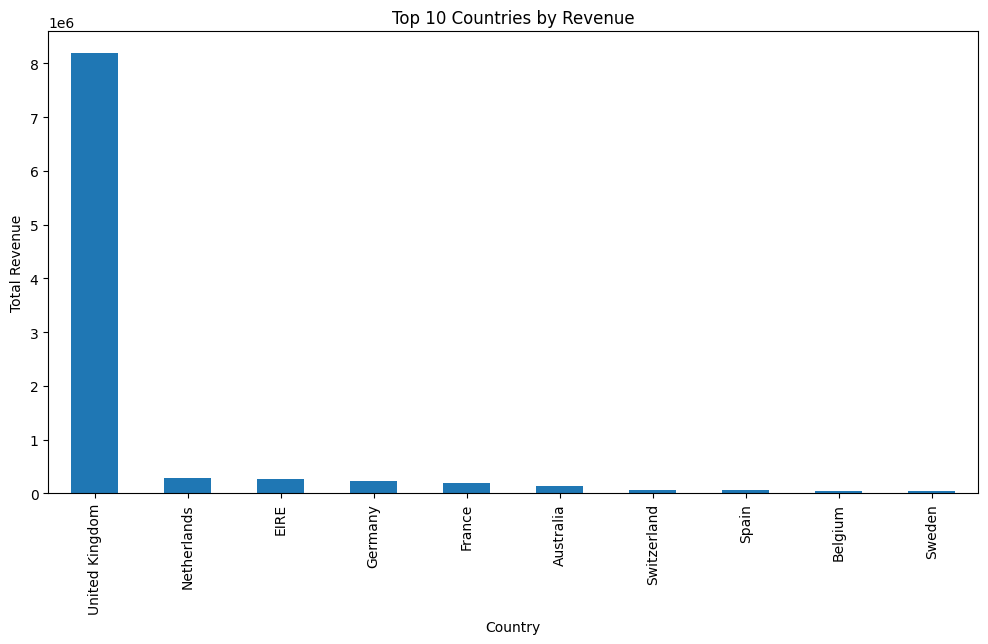

In [192]:
top_countries = revenue_by_country.sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(12,6), title='Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.show()

In [193]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,...,InvoiceMinute,InvoiceWeekday,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase,IsCancellation
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,...,1,1,False,Winter,2011-01-18 10:01:00,0,77183.6,1.0,False,False
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,...,17,1,False,Winter,2011-01-18 10:01:00,0,-77183.6,2.0,True,False
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,25.2,1.0,False,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,17.0,2.0,True,False
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,...,57,1,False,Winter,2010-12-07 14:57:00,0,39.0,3.0,True,False


In [194]:
df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

The average unit price is about 4.61, but this is heavily influenced by extreme values.

The standard deviation is very large (96.76), indicating huge variation in unit prices across products.

There are negative values (min = -11,062.06), which normally shouldn't happen for prices. This likely indicates:

Data errors,

Refunds or adjustments recorded in UnitPrice,

Or cancellations incorrectly labeled.

The maximum price is extremely high (38,970), which could be a very expensive product or a data outlier.

The median price is 2.08, which suggests most products are relatively low priced, but a few very high values skew the mean upwards.

Check for Anomalies
Look for unusual values like zero or negative prices:

In [195]:
zero_price_count = (df['UnitPrice'] == 0).sum()
negative_price_count = (df['UnitPrice'] < 0).sum()
print(f"Zero prices: {zero_price_count}, Negative prices: {negative_price_count}")

Zero prices: 2515, Negative prices: 2


Price Distribution Visualization
Plot the distribution to understand price spread:

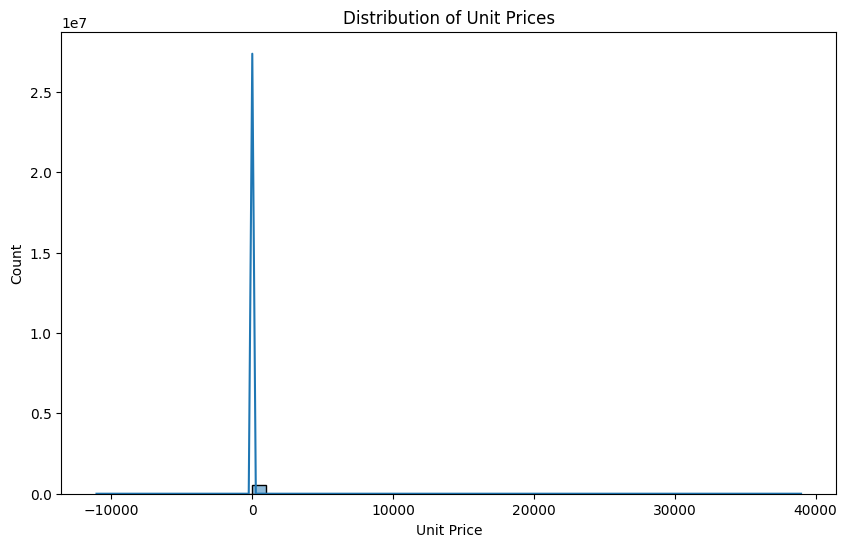

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.show()

Analyze Price by Product (StockCode)
Check average price per product

In [197]:
avg_price_per_product = df.groupby('StockCode')['UnitPrice'].mean().sort_values(ascending=False)
avg_price_per_product.head(10)

StockCode
AMAZONFEE       7324.784706
CRUK             495.839375
M                375.566392
DOT              290.495859
BANK CHARGES     202.855162
22828            156.428571
22655            147.457447
22827            145.967742
22656            138.333333
22826            115.388889
Name: UnitPrice, dtype: float64

Some codes like AMAZONFEE, BANK CHARGES, CRUK have very high average unit prices — these are likely fees, service charges, or special transactions, not regular products.

Codes like DOT and other numeric ones have high average unit prices and may be premium products or bulk-priced items.

These unusually high average prices inflate the overall price distribution and should be treated differently if analyzing product sales or pricing.

Detect Discounted or Promotional Sales

In [198]:
median_price = df.groupby('StockCode')['UnitPrice'].median()
df = df.join(median_price, on='StockCode', rsuffix='_median')
df['Discounted'] = df['UnitPrice'] < df['UnitPrice_median']

In [199]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,...,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase,IsCancellation,UnitPrice_median,Discounted
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,...,False,Winter,2011-01-18 10:01:00,0,77183.6,1.0,False,False,1.25,True
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,...,False,Winter,2011-01-18 10:01:00,0,-77183.6,2.0,True,False,1.25,True
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,...,False,Winter,2010-12-07 14:57:00,0,25.2,1.0,False,False,1.63,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,...,False,Winter,2010-12-07 14:57:00,0,17.0,2.0,True,False,4.25,False
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,...,False,Winter,2010-12-07 14:57:00,0,39.0,3.0,True,False,3.29,True


True means that the UnitPrice in that row is less than the median price for that product — i.e., likely sold at a discount or lower than typical price.

False means the price is at or above the median — so it’s at a regular or premium price point.

Price Variation Over Time

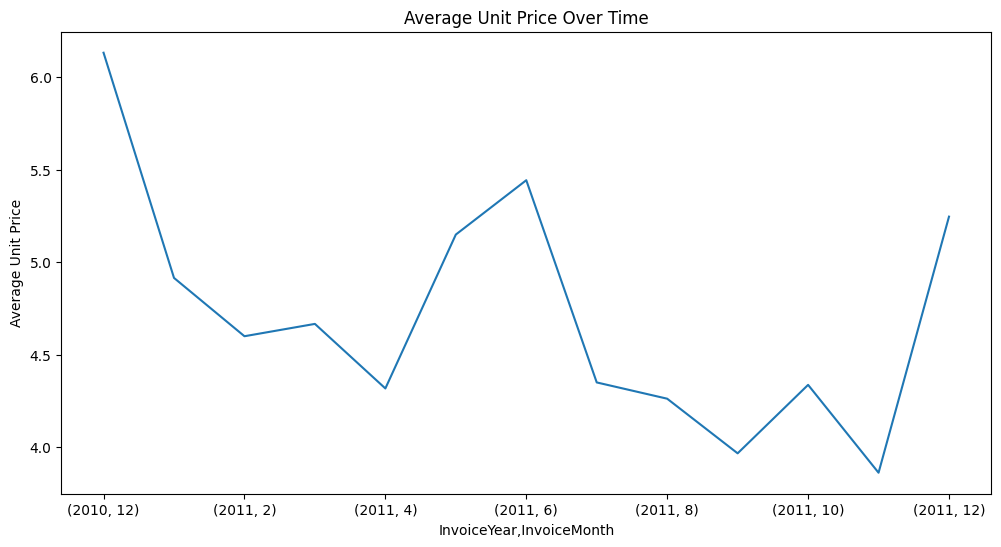

In [200]:
price_over_time = df.groupby(['InvoiceYear', 'InvoiceMonth'])['UnitPrice'].mean()
price_over_time.plot(kind='line', figsize=(12,6), title='Average Unit Price Over Time')
plt.ylabel('Average Unit Price')
plt.show()


In [201]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,...,IsWeekend,Season,FirstPurchaseDate,DaysSinceFirstPurchase,TotalPrice,PurchaseRank,IsRepeatPurchase,IsCancellation,UnitPrice_median,Discounted
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,...,False,Winter,2011-01-18 10:01:00,0,77183.6,1.0,False,False,1.25,True
61624,C541433,23166,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,18,...,False,Winter,2011-01-18 10:01:00,0,-77183.6,2.0,True,False,1.25,True
14938,537626,85116,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,...,False,Winter,2010-12-07 14:57:00,0,25.2,1.0,False,False,1.63,False
14939,537626,22375,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,...,False,Winter,2010-12-07 14:57:00,0,17.0,2.0,True,False,4.25,False
14940,537626,71477,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,...,False,Winter,2010-12-07 14:57:00,0,39.0,3.0,True,False,3.29,True


Feature Selection

target

In [202]:
y = df['IsRepeatPurchase']

feature

In [203]:
features = [
    'Quantity', 'UnitPrice', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay',
    'InvoiceHour', 'InvoiceWeekday', 'IsWeekend', 'DaysSinceFirstPurchase',
    'TotalPrice', 'PurchaseRank', 'IsCancellation', 'Discounted'
]

handle categorical

In [204]:
df_encoded = pd.get_dummies(df[['Country', 'Season']], drop_first=True)
X = pd.concat([df[features], df_encoded], axis=1)

train-test split

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train models and compare

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: LogisticRegression
[[  1446      0]
 [     1 177383]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1446
        True       1.00      1.00      1.00    177384

    accuracy                           1.00    178830
   macro avg       1.00      1.00      1.00    178830
weighted avg       1.00      1.00      1.00    178830


Model: RandomForest
[[  1446      0]
 [     0 177384]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1446
        True       1.00      1.00      1.00    177384

    accuracy                           1.00    178830
   macro avg       1.00      1.00      1.00    178830
weighted avg       1.00      1.00      1.00    178830



c:\Users\amitk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:59:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
[[  1446      0]
 [     0 177384]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1446
        True       1.00      1.00      1.00    177384

    accuracy                           1.00    178830
   macro avg       1.00      1.00      1.00    178830
weighted avg       1.00      1.00      1.00    178830



Feature Importance (to know which features matter most)

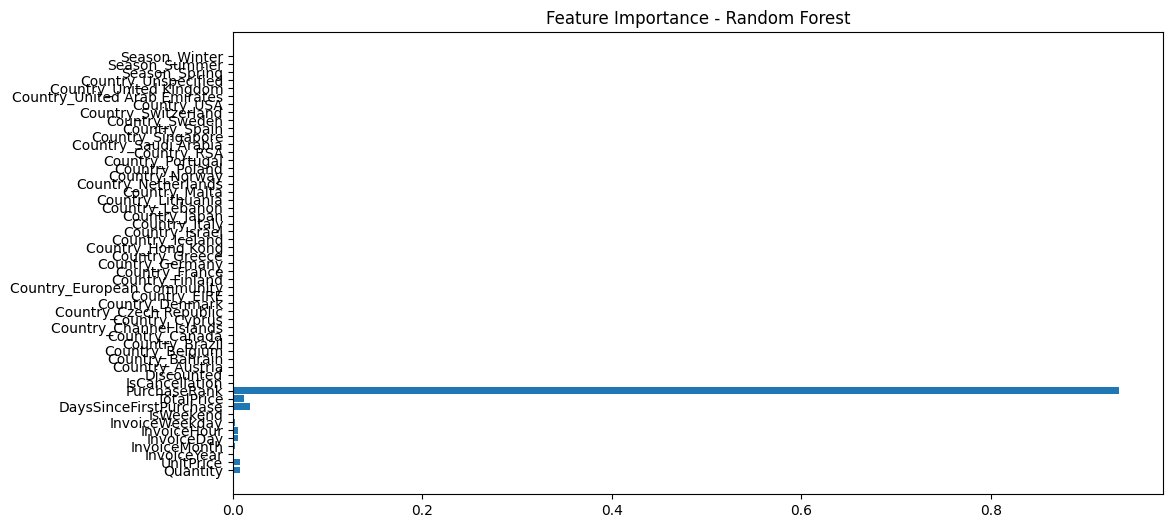

In [207]:
rf_model = models['RandomForest']
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance - Random Forest")
plt.show()


Hyperparameter Tuning

In [208]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': None, 'n_estimators': 50}


In [209]:
print(y.value_counts(normalize=True))

IsRepeatPurchase
True     0.99193
False    0.00807
Name: proportion, dtype: float64


In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [211]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [212]:
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       875
        True       1.00      1.00      1.00    107507

    accuracy                           1.00    108382
   macro avg       0.93      1.00      0.96    108382
weighted avg       1.00      1.00      1.00    108382



In [213]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 1.0


The high recall for False (first-time buyers) means it's not missing rare classes.

AUC = 1.0 (perfect separation between classes) — either your model is very good, or it’s potentially overfitting.

Check for Overfitting
Check training vs. testing scores to make sure you’re not overfitting:

In [214]:
print("Train Accuracy:", model.score(X_resampled, y_resampled))
print("Test Accuracy :", model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy : 0.9986529128453064


Feature Importance Analysis

In [215]:
df=df.drop('PurchaseRank', axis=1)

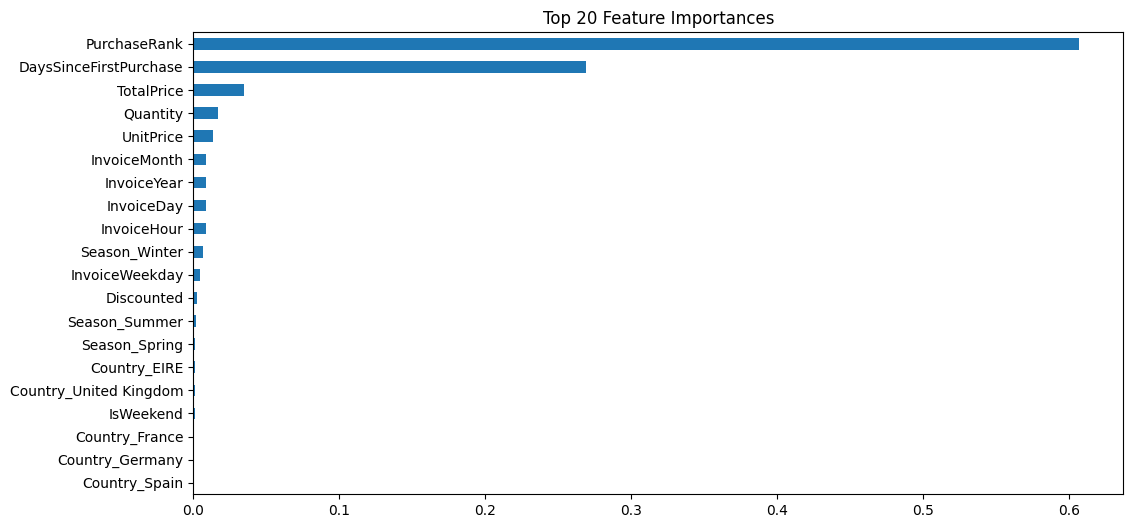

In [216]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feat_imp.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [217]:
X_test_copy = X_test.copy()
X_test_copy['true'] = y_test.values
X_test_copy['pred'] = model.predict(X_test)
errors = X_test_copy[X_test_copy['true'] != X_test_copy['pred']]
print(errors.head())

        Quantity  UnitPrice  InvoiceYear  InvoiceMonth  InvoiceDay  \
9762           4       4.25         2010            12           5   
385355         1       1.95         2011            10           7   
17389         -8       1.65         2010            12           8   
7790           1       7.95         2010            12           5   
67494          2       0.85         2011             1          21   

        InvoiceHour  InvoiceWeekday  IsWeekend  DaysSinceFirstPurchase  \
9762             15               6       True                       0   
385355           15               4      False                       0   
17389            11               2      False                       0   
7790             11               6       True                       0   
67494            17               4      False                       0   

        TotalPrice  ...  Country_Switzerland  Country_USA  \
9762         17.00  ...                False        False   
385355      

1. Target first-time buyers with welcome offers
2. Reward repeat customers with loyalty programs
3. Prevent churn by identifying customers unlikely to return
4. Improve marketing ROI by focusing on behavior-driven segmentation

In [218]:
import joblib

# Save model
joblib.dump(model, 'repeat_purchase_predictor.pkl')

# Load model
model = joblib.load('repeat_purchase_predictor.pkl')